In [1]:
# Python Imports

# Custom Library Imports
# from util.load_data_by_os import DataManager

#External Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# datamanager = DataManager()

In [3]:
# Import ORD specific Data
ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")
# ord_df = datamanager.load_ord_by_os()

/tmp/ipykernel_59928/2935119021.py:2: DtypeWarning: Columns (12,14,87,94) have mixed types. Specify dtype option on import or set low_memory=False.
  ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")


In [4]:
# Columns with mixed type warning, lets investigate
ord_df.iloc[:, [12, 14, 87, 94]]

,Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Div2Airport,Div2TailNum
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
599720,NaN,NaN,NaN,NaN
599721,NaN,NaN,NaN,NaN
599722,NaN,NaN,NaN,NaN
599723,NaN,NaN,NaN,NaN


In [5]:
# None of these columns are needed, we can ignore and create our second subfile
include_lst = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate','Marketing_Airline_Network', 'Tail_Number', 'Flight_Number_Operating_Airline',
'Tail_Number', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay',
'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn',
'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
'LateAircraftDelay']

new_ord_df = ord_df[include_lst]

In [6]:
print(len(new_ord_df))
new_ord_df.head()

599725


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Tail_Number,Flight_Number_Operating_Airline,Tail_Number,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2021,4,11,17,3,2021-11-17,UA,N442AW,3727,N442AW,...,110.0,72.0,1.0,536.0,3,NaN,NaN,NaN,NaN,NaN
1,2021,4,11,17,3,2021-11-17,UA,N423AW,3726,N423AW,...,138.0,89.0,1.0,473.0,2,1.0,0.0,11.0,0.0,18.0
2,2021,4,11,17,3,2021-11-17,UA,N438AW,3725,N438AW,...,64.0,29.0,1.0,67.0,1,NaN,NaN,NaN,NaN,NaN
3,2021,4,11,17,3,2021-11-17,UA,N433AW,3723,N433AW,...,163.0,124.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN
4,2021,4,11,17,3,2021-11-17,UA,N433AW,3722,N433AW,...,146.0,120.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN


In [7]:
# new_ord_df.to_csv('../data/ORD_11_21-11-22_short.csv')

In [8]:
ord_df = new_ord_df

def lst_na_cols():
    na_col_lst = []
    no_na_lst = []
    for i in ord_df.columns:
        if ord_df[i].isna().values.any():
            na_col_lst.append(i)
        else:
            no_na_lst.append(i)
    assert len(ord_df.columns) == (len(na_col_lst) + len(no_na_lst))

    print("NA exists in:", na_col_lst)
    print("There are no NAs in :", no_na_lst)

lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup']


In [9]:
# Before dealing with NA we should fill the NAs that should be zero
# These are delay times for sure
ord_df['CarrierDelay'] = ord_df['CarrierDelay'].fillna(0)
ord_df['WeatherDelay'] = ord_df['WeatherDelay'].fillna(0)
ord_df['NASDelay'] = ord_df['NASDelay'].fillna(0)
ord_df['SecurityDelay'] = ord_df['SecurityDelay'].fillna(0)

In [10]:
lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']


In [11]:
pre_ord_df_len = len(ord_df)
ord_df = ord_df.dropna(subset=['ArrDelayMinutes', 'ArrDelay'])
print(f"Dropped {pre_ord_df_len - len(ord_df)} data points")

Dropped 17004 data points


In [12]:
# Going to drop 1% outliers from delay types
# outlier_lst = ['ArrDelay','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']

# test = ord_df

# # for i in outlier_lst:
# #     temp = ord_df[i].quantile(0.98)
# #     test = ord_df[ord_df[i] < temp]
# # test.describe()

# for i in outlier_lst:
#     test = ord_df[ord_df[i] < 1440]

# test.describe()

## Exploring

Let's explore some basic data on important points and make basic figures

In [13]:
ord_df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Operating_Airline,OriginStateFips,DestStateFips,CRSDepTime,DepTime,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,...,582721.000000,582721.000000,582721.0,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,582721.000000,106863.000000
mean,2021.826394,2.545309,6.646579,15.760594,3.971806,2935.252373,23.518193,23.529554,1291.458204,1296.278572,...,134.099427,105.237357,1.0,739.762629,3.408487,5.076694,0.806674,2.375880,0.017684,28.138813
std,0.378771,1.107837,3.409322,8.741559,2.005439,1587.087287,12.851829,12.864085,466.910970,478.588559,...,60.779446,59.513498,0.0,506.794545,1.923107,36.478867,14.319411,15.418496,2.332352,67.688242
min,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,9.000000,1.0,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,4.000000,8.000000,2.000000,1678.000000,17.000000,17.000000,855.000000,857.000000,...,89.000000,60.000000,1.0,342.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,3.000000,7.000000,16.000000,4.000000,3017.000000,17.000000,17.000000,1300.000000,1305.000000,...,124.000000,95.000000,1.0,637.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,4.000000,10.000000,23.000000,6.000000,3936.000000,31.000000,31.000000,1714.000000,1718.000000,...,163.000000,132.000000,1.0,925.000000,4.000000,0.000000,0.000000,0.000000,0.000000,31.000000
max,2022.000000,4.000000,12.000000,31.000000,7.000000,9680.000000,78.000000,78.000000,2359.000000,2400.000000,...,651.000000,545.000000,1.0,4243.000000,11.000000,5986.000000,1451.000000,1310.000000,1245.000000,2302.000000


In [14]:
ord_delay_mean = ord_df['ArrDelay'].mean()
ord_delay_median = ord_df['ArrDelay'].median()

print("ORD All flights Delay Mean:", ord_delay_mean)
print("ORD All flights Delay Median:", ord_delay_median)

ORD All flights Delay Mean: 4.1678178751066115
ORD All flights Delay Median: -8.0


In [15]:
ord_delays_df = ord_df['ArrDelay'] >= 15
ord_delays_df = ord_df[ord_delays_df]
ord_delay_mean = ord_delays_df['ArrDelay'].mean()
ord_delay_median = ord_delays_df['ArrDelay'].median()

print("ORD Delay Mean:", ord_delay_mean)
print("ORD Delay Median:", ord_delay_median)

ORD Delay Mean: 73.27490338096442
ORD Delay Median: 42.0


In [16]:
flights_num = ord_df['ArrDelay'].count()
delays_num = ord_delays_df['ArrDelay'].count()
print("Amount of Flights:", flights_num)
print("Amount of Delays:", delays_num)
print("Precentage of Delayed Flights:", (delays_num/flights_num))

Amount of Flights: 582721
Amount of Delays: 106863
Precentage of Delayed Flights: 0.183386217417941


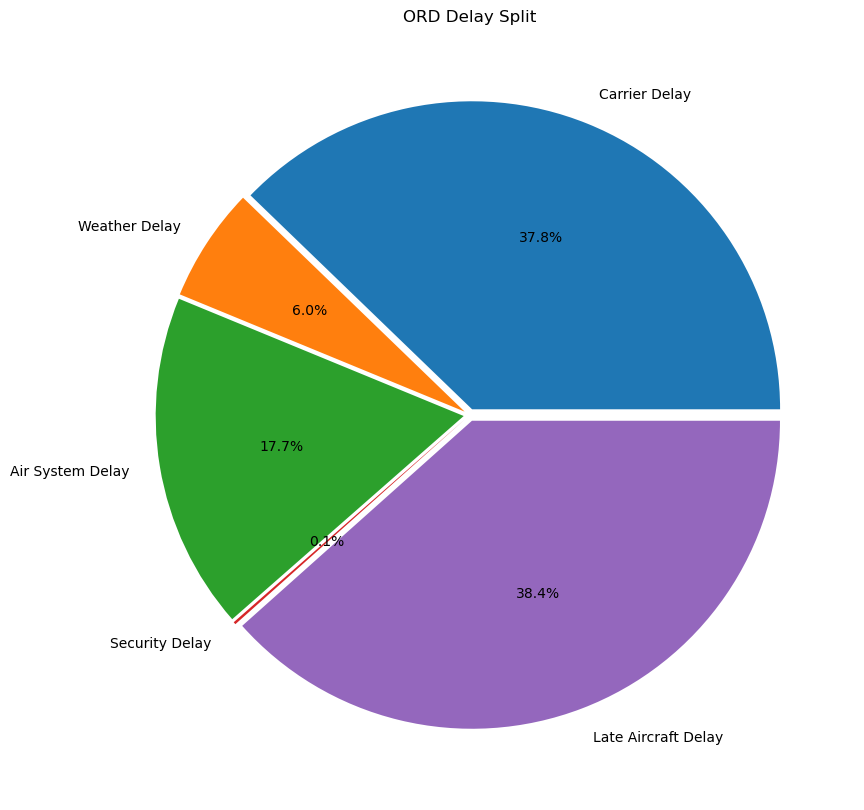

In [17]:
pie_chart_lst = [ord_df['CarrierDelay'].sum(), ord_df['WeatherDelay'].sum(),
 ord_df['NASDelay'].sum(), ord_df['SecurityDelay'].sum(), ord_df['LateAircraftDelay'].sum()]

pie_chart_labels_lst = ["Carrier Delay", 'Weather Delay', 'Air System Delay',
 'Security Delay', 'Late Aircraft Delay']

fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ax1.pie(pie_chart_lst, labels=pie_chart_labels_lst, autopct='%1.1f%%', explode=(.02, .02, .02, .02, .02));
ax1.set_title("ORD Delay Split");

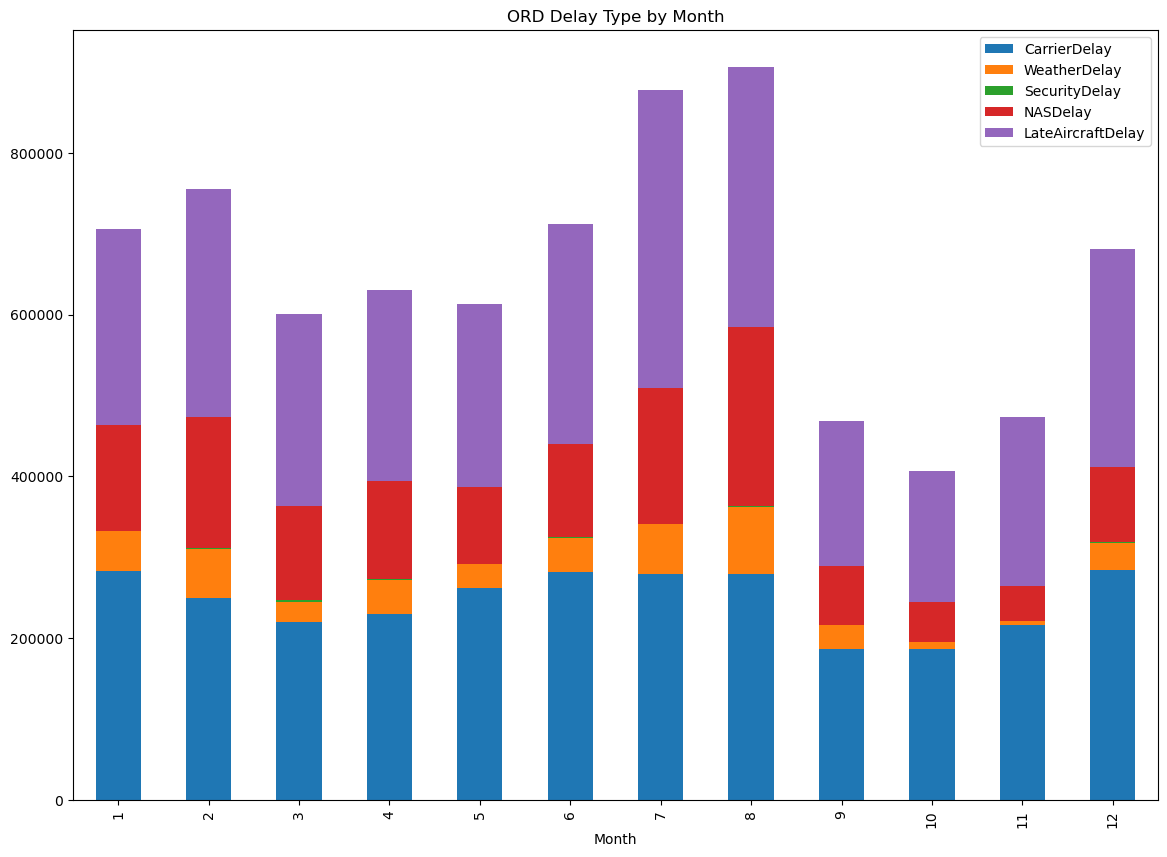

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

ord_delay_types_df = ord_delays_df[['Month','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']]
delay_cnt_month = ord_delay_types_df.groupby(by='Month').sum()
delay_cnt_month.plot(ax=ax1, kind='bar', stacked=True)
ax1.set_title("ORD Delay Type by Month");

<AxesSubplot: >

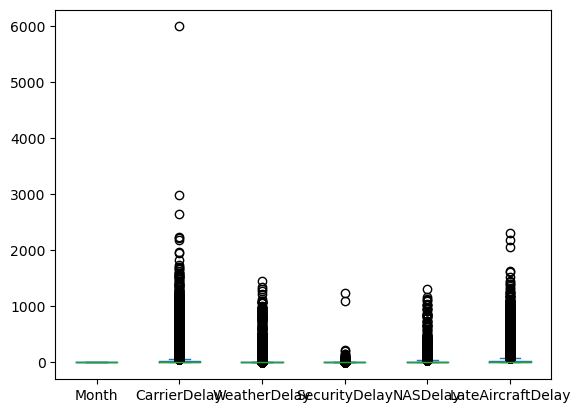

In [19]:
ord_delay_types_df.plot.box()

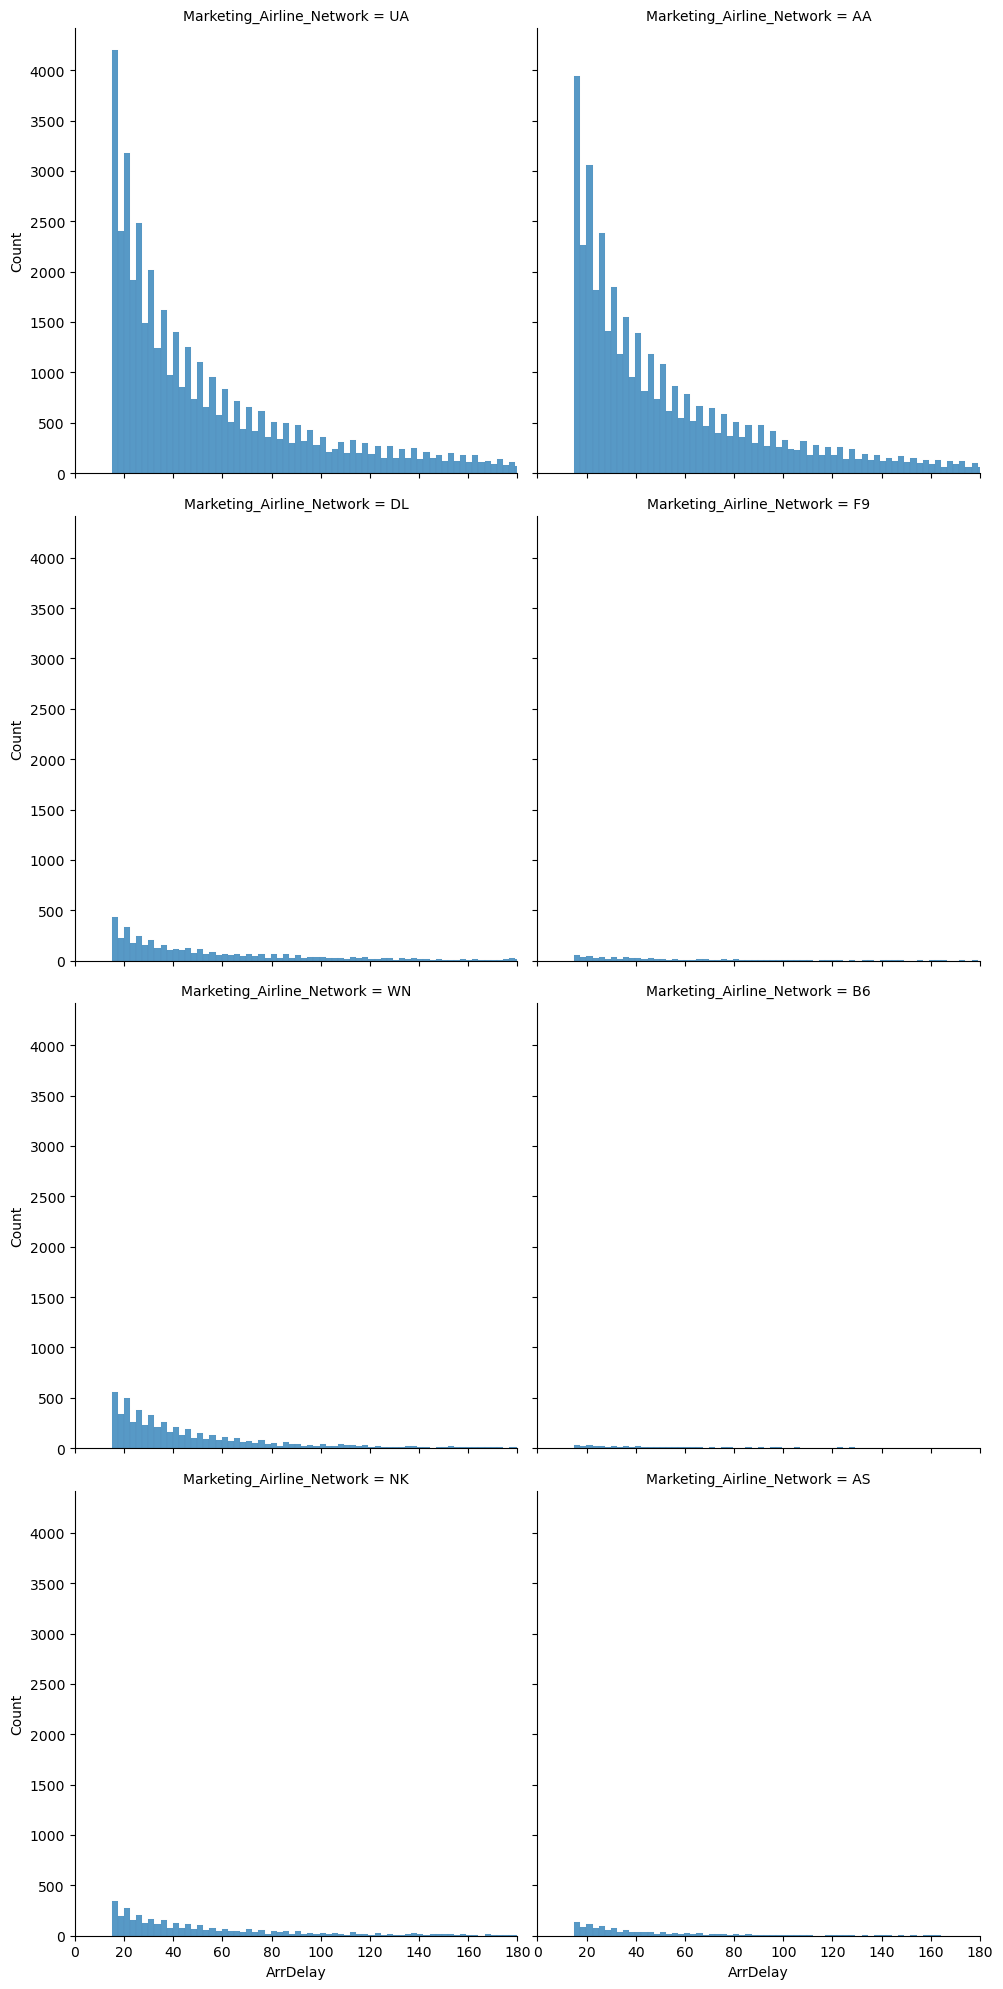

In [20]:
airlines_distribution = sns.displot(data=ord_delays_df, x='ArrDelay', col='Marketing_Airline_Network', col_wrap=2)
airlines_distribution.set(xlim=(0,180))

In [21]:
airline_nums = ord_df.groupby(by='Marketing_Airline_Network').count()
airline_nums.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Tail_Number,Flight_Number_Operating_Airline,Tail_Number,Origin,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Marketing_Airline_Network,,,,,,,,,,,,,,,,,,,,,
AA,221669,221669,221669,221669,221669,221669,221669,221669,221669,221669,...,221669,221669,221669,221669,221669,221669,221669,221669,221669,43281
AS,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,...,6305,6305,6305,6305,6305,6305,6305,6305,6305,1372
B6,2223,2223,2223,2223,2223,2223,2223,2223,2223,2223,...,2223,2223,2223,2223,2223,2223,2223,2223,2223,586
DL,26734,26734,26734,26734,26734,26734,26734,26734,26734,26734,...,26734,26734,26734,26734,26734,26734,26734,26734,26734,4656
F9,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369,...,2369,2369,2369,2369,2369,2369,2369,2369,2369,736


Text(0.5, 1.0, 'Flights at ORD by Airline')

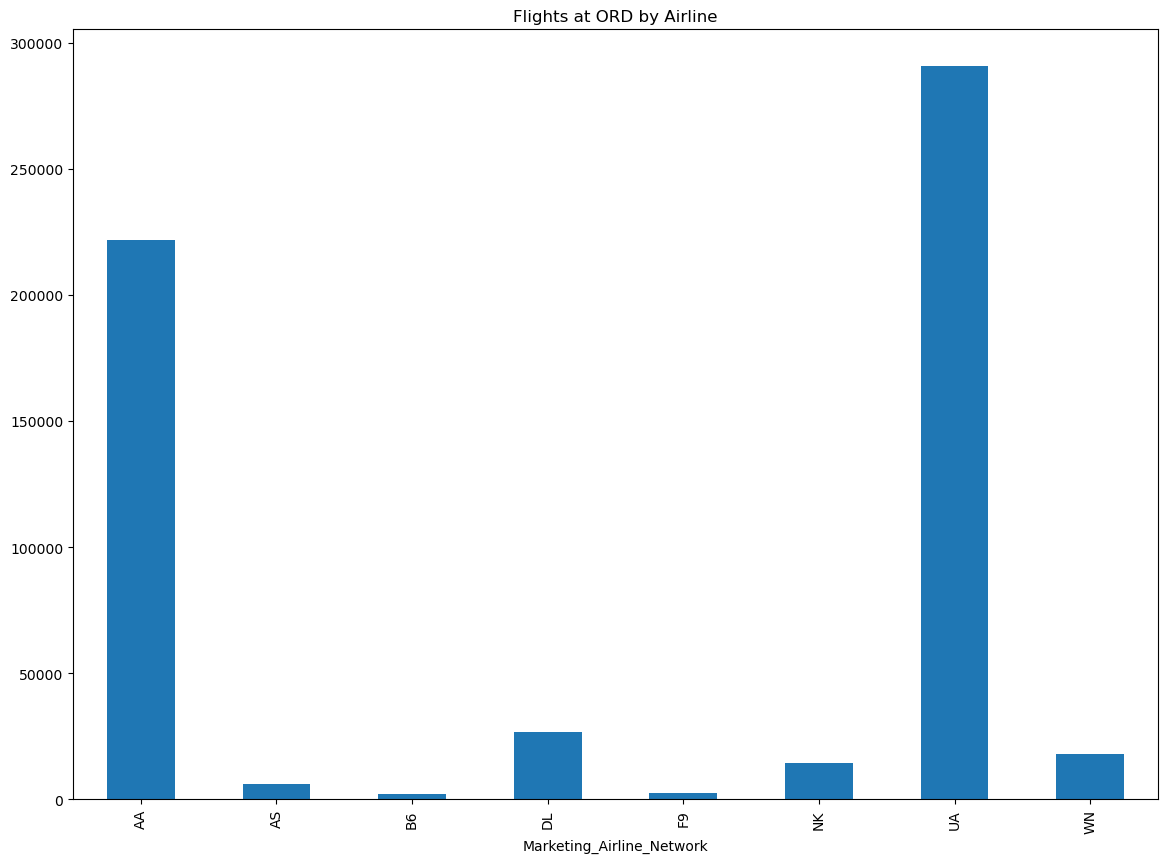

In [22]:
# a little weird of a way to do this but we can see how many entries of year there is per airline
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

airline_nums_flights = airline_nums['Year']
airline_nums_flights.plot.bar(ax=ax1)
ax1.set_title("Flights at ORD by Airline")

In [23]:
airline_carrier_delay_nums = ord_df.groupby(by='Marketing_Airline_Network').sum(numeric_only=True)

airline_nums_flights = airline_carrier_delay_nums['CarrierDelay']
airline_nums_flights.plot.bar(ax=ax1)
ax1.set_title("Carrier Delay Minutes by Airline")

Text(0.5, 1.0, 'Carrier Delay Minutes by Airline')

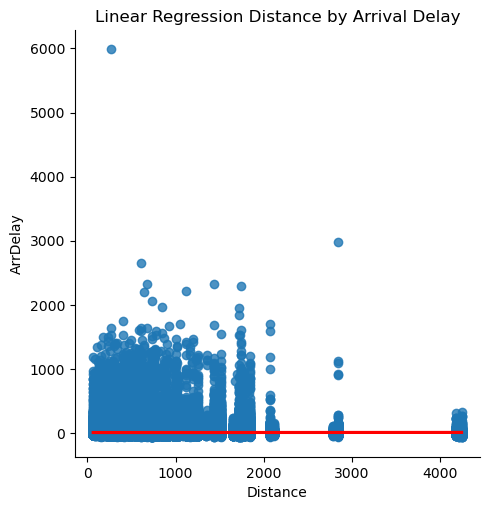

In [24]:
dist_lm = sns.lmplot(data=ord_df, x='Distance', y='ArrDelay', line_kws={'color':'red'})
dist_lm.set(title='Linear Regression Distance by Arrival Delay')

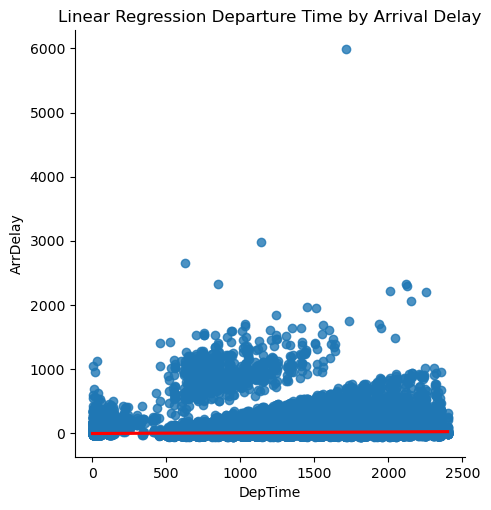

In [25]:
dep_time_lm = sns.lmplot(data=ord_df, x='DepTime', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Departure Time by Arrival Delay')

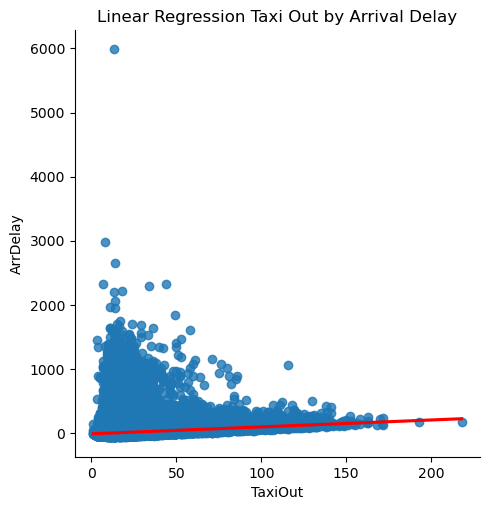

In [26]:
dep_time_lm = sns.lmplot(data=ord_df, x='TaxiOut', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Taxi Out by Arrival Delay')

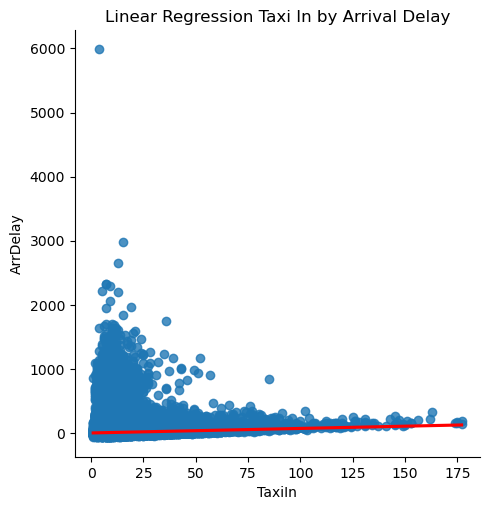

In [27]:
dep_time_lm = sns.lmplot(data=ord_df, x='TaxiIn', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Taxi In by Arrival Delay')

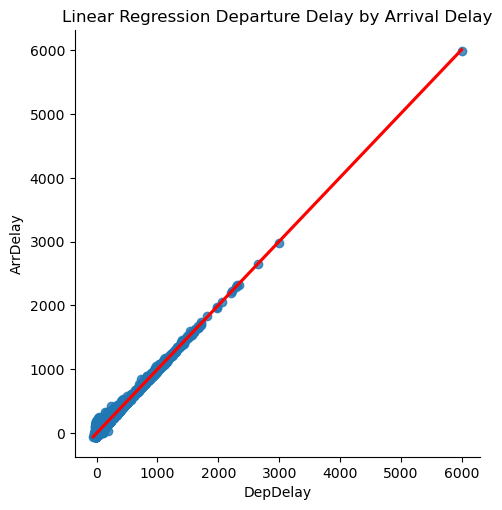

In [28]:
dep_time_lm = sns.lmplot(data=ord_df, x='DepDelay', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Departure Delay by Arrival Delay')

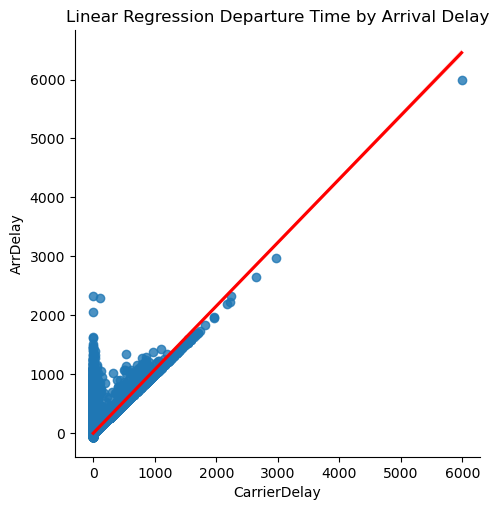

In [29]:
dep_time_lm = sns.lmplot(data=ord_df, x='CarrierDelay', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Carrier Delay by Arrival Delay')

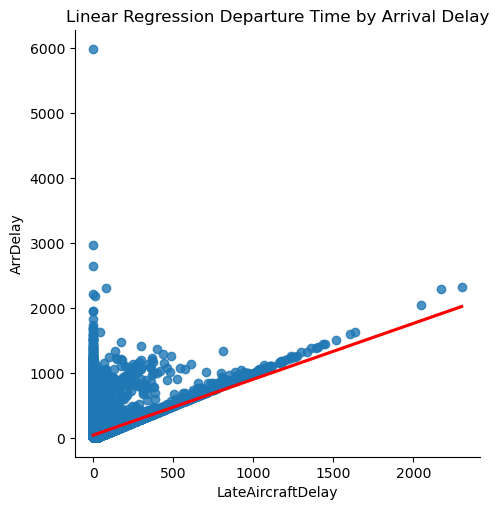

In [30]:
dep_time_lm = sns.lmplot(data=ord_df, x='LateAircraftDelay', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Late Aircraft by Arrival Delay')

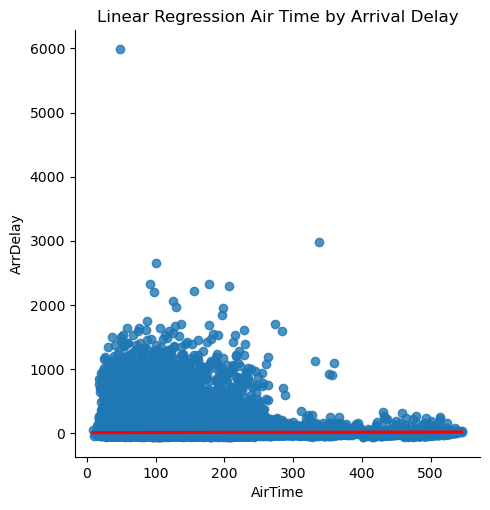

In [33]:
dep_time_lm = sns.lmplot(data=ord_df, x='AirTime', y='ArrDelay', line_kws={'color':'red'})
dep_time_lm.set(title='Linear Regression Air Time by Arrival Delay')